<h4 align="right">30th of March 2020</h4>
<h1 align="center">Neural Networks and Deep Learning (CIE 555)</h1>
<h2 align="center">Lab 8: Recurrent Neural Networks</h2>
<h3 align="center">Part 2: Time Series Analysis</h3><br>

#Time Series Analysis with LSTM

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mplt

import pandas as pd  
import numpy as np  
#import tensorflow as tf
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense  
from tensorflow.keras.layers import LSTM 
from tensorflow.keras.layers import Dropout

from google.colab import files

###Loading Dataset and Visualization

In [ ]:
#Upload file from local drive
files.upload()

#Training data in the period from 01/01/2013 to 31/12/2017
data_train = pd.read_csv(r'AAPL_train.csv')

Saving AAPL_train.csv to AAPL_train (2).csv


## Dataset
The AAPL dataset is a day-by-day values of a stock market in the period from 01/01/2013 to 31/12/2017

In [ ]:
#Visualize data imported from the csv file
data_train.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-12-31,72.932854,76.485718,72.714287,76.024284,53.974899,164873100
1,2013-01-02,79.117142,79.285713,77.375717,78.432854,55.684914,140129500
2,2013-01-03,78.268570,78.524284,77.285713,77.442856,54.982059,88241300


Text(0, 0.5, 'Apple opening stock price')

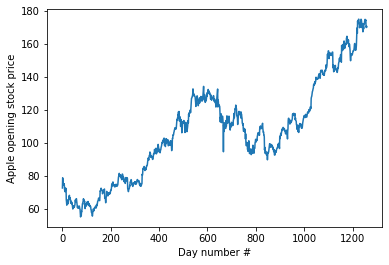

In [ ]:
#Plot data training data
plt.plot(data_train['Open'])
plt.xlabel('Day number #')
plt.ylabel('Apple opening stock price')

###Preprocessing

In [ ]:
#Normalize features
from sklearn.preprocessing import MinMaxScaler 

data_train_open = np.asarray(data_train['Open'].values).reshape(-1,1) #ِAdd second dimension of 1 to be able to use MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
data_train_open_scaled = scaler.fit_transform(data_train_open)

We want to predict the open market value at each day in the dataset based on the open values of the previous 60 days. So, each training data point is a list of prediction_period values and its corresponding target value is the value of the day following the prediction period. 

In [ ]:
#Preparing training data features and labels
pred_period = 60; # prediction of the next value based on the last pred_period days
xtrain = []  
ytrain = []  
for i in range(pred_period, len(data_train_open_scaled)):  
    xtrain.append(data_train_open_scaled[i-pred_period:i, 0])   
    ytrain.append(data_train_open_scaled[i, 0])

#Converting xtrain and ytrain to numpy arrays    
xtrain, ytrain = np.array(xtrain), np.array(ytrain)
xtrain.shape

(1200, 60)

In [ ]:

#Reshaping xtrain to be accepted by LSTM module
xtrain = xtrain.reshape(-1,pred_period,1)
xtrain.shape

(1200, 60, 1)

###Building Model

* return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence. default = False. 
We set it to true in the LSTM layers followed by other LSTM layers, since we want to pass sequence of data between the layers. However, in the last LSTM layer that is followed by a Dense layer, we set it to false as we want only to pass the final values of the LSTM units. The Dense layer doesn't accept sequences of data. 

In [ ]:
#Building the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(pred_period, 1)))
#model.add(Dropout(0.2))  
model.add(LSTM(units=50, return_sequences=True))
#model.add(Dropout(0.2))  
model.add(LSTM(units=50, return_sequences=True))
#model.add(Dropout(0.2))  
model.add(LSTM(units=50))
#model.add(Dropout(0.2))  
model.add(Dense(units = 1))  

model.compile(optimizer = 'adam', loss = 'mean_squared_error')  

model.fit(xtrain, ytrain, epochs = 100, batch_size = 64)  

Epoch 1/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0521
Epoch 2/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0074
Epoch 3/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0029
Epoch 4/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0022
Epoch 5/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0022
Epoch 6/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0019
Epoch 7/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0019
Epoch 8/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0019
Epoch 9/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0018
Epoch 10/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0017
Epoch 11/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0016
Epoch 12/100
19/19 [==============================] - 0s 16ms/step - loss: 0.0016
Epoch 13/100
19/19 [=====

###Predicting and Visualizing Model's Output of Training Set

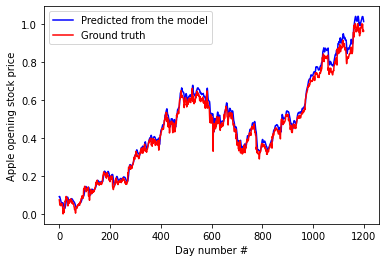

In [ ]:
ypred = model.predict(xtrain)

plt.plot(ypred, color='blue', label='Predicted from the model')
plt.plot(ytrain, color='red', label='Ground truth')
plt.xlabel('Day number #')
plt.ylabel('Apple opening stock price')
plt.legend()